In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV


# In a real project you'd do pd.read_csv('creditcard.csv') or smthing
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=50000, n_features=29, n_informative=10,
                           n_redundant=5, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, weights=[0.99, 0.01],
                           flip_y=0, random_state=42)

#ANANYMISED FEATURES it would be like V1,V2 etc.
feature_names = [f'V{i}' for i in range(1, 30)]
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Class
0,-1.287444,0.019401,-0.711956,-0.052681,0.253800,0.625048,-3.861658,-0.724276,1.666806,6.270583,...,5.059935,-0.874253,-1.126127,4.752186,1.877089,0.724274,-0.822844,-1.835499,0.517328,0
1,-0.227586,-0.043874,-1.264822,-0.233686,-0.283818,0.491488,-3.027268,-3.078582,1.038397,6.907459,...,3.383221,-0.499343,-0.218211,1.604890,1.033864,1.357596,-1.763337,-0.680381,1.139266,0
2,-2.446165,0.267362,1.931722,-0.558414,1.235082,-1.424941,0.375458,-0.610801,2.155984,-3.945346,...,-1.069125,0.803563,2.462321,-2.676145,0.409382,0.333351,-1.716563,1.665825,-1.958924,0
3,1.484647,0.004114,0.801726,-0.293864,3.476167,0.616430,-3.773009,0.181536,1.355294,-2.871908,...,0.012395,-0.680560,1.895327,0.800868,0.333599,-0.280947,-2.244222,-0.270313,-4.986801,0
4,0.967469,0.421424,-0.761842,-1.410787,3.206301,0.160974,-1.610955,-1.767966,1.548720,-0.598819,...,3.568170,1.313539,0.590683,-2.737402,0.385109,-0.621516,-1.922243,-1.587514,0.612993,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.468611,0.687927,0.429950,0.465531,4.736881,-0.134520,-2.071454,0.842639,-1.791784,-3.142423,...,-1.002329,1.012817,0.775334,-3.633752,-1.063975,-1.171916,-1.916104,1.013160,-2.765583,0
49996,1.279958,-0.193428,0.214959,2.267710,1.126475,-0.919017,-1.950510,-2.375777,-1.705537,4.212159,...,3.015957,-1.673803,-1.733943,2.902836,0.744088,0.267012,-1.424494,0.580140,-1.306506,0
49997,0.404351,-0.846754,0.002258,-0.678650,-0.852098,-1.932952,-0.493397,0.768099,0.159268,5.718373,...,3.012702,-2.095312,-2.645188,7.672719,-0.160877,-0.891963,-4.371751,0.658668,1.522569,0
49998,0.500342,1.121672,-0.519011,0.504339,2.038018,-1.367184,-0.430451,-0.125450,-0.156056,-1.429710,...,4.182023,-2.108241,-1.136275,1.072777,-0.595533,-0.375786,-1.322397,-0.380328,-1.179647,0


False


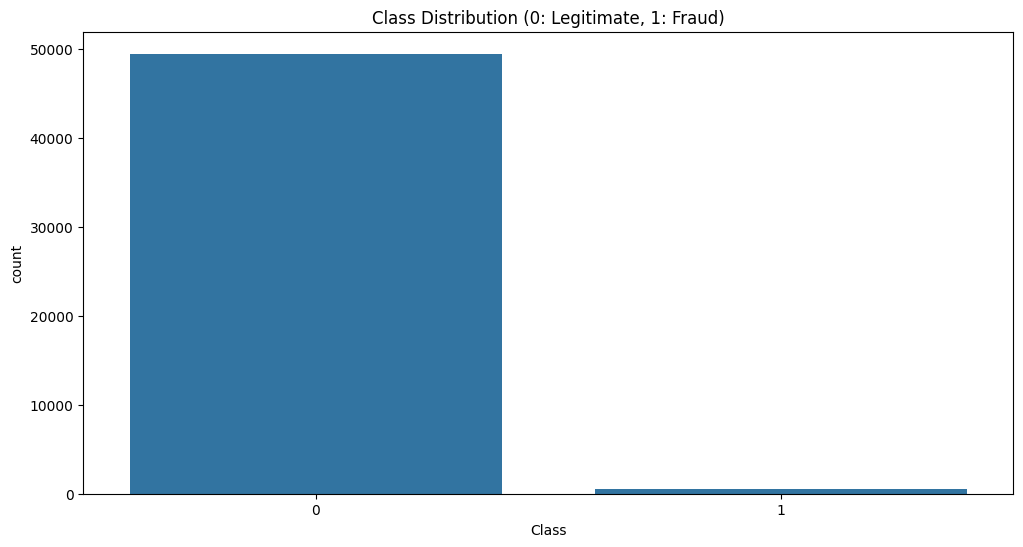

Class
0    49500
1      500
Name: count, dtype: int64


In [9]:
#EDA
print(df.isnull().sum().any())

#CLASS IMBALANCE
plt.figure(figsize=(12, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show()

print(df['Class'].value_counts())

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



#WE SCALED USIGN STD AND MEAN OF THE TRAINING DATA TO PREVENT DATA LEAKAGE

#WE DIDNT SCALE THE BINARY TARGET THATS NOT IT

rf=RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=42,class_weight='balanced')

rf.fit(X_train_scaled,y_train)

y_pred=rf.predict(X_test_scaled)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}") # We expect this to be high but misleading
#ACCURACY DOEST MEAN ANYTHING AS IT IS AN IMBALANCED DF

print(confusion_matrix(y_test, y_pred))
#SO WE CAUGHT 47 TRUE VALUES AND GAVE 53 FALSE POSITIVES

print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))


Accuracy: 0.99
[[9900    0]
 [  53   47]]
              precision    recall  f1-score   support

  Legitimate       0.99      1.00      1.00      9900
       Fraud       1.00      0.47      0.64       100

    accuracy                           0.99     10000
   macro avg       1.00      0.73      0.82     10000
weighted avg       0.99      0.99      0.99     10000



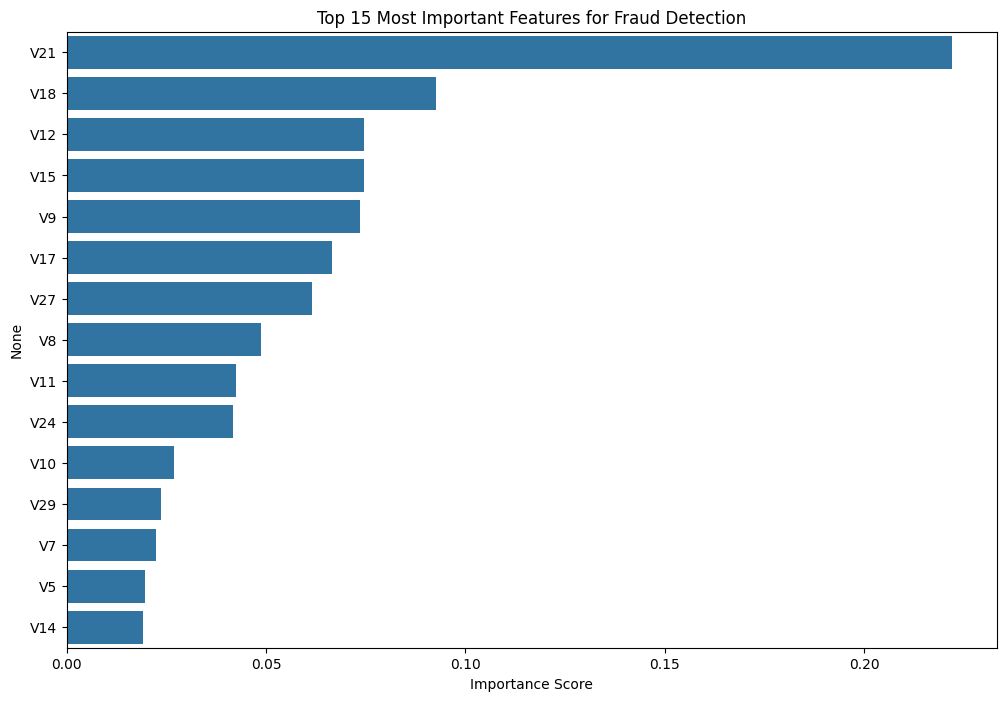

In [11]:
#FILTER REAL FEATURES THAT ACC HELP
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=importances_sorted.head(15), y=importances_sorted.head(15).index)
plt.title('Top 15 Most Important Features for Fraud Detection')
plt.xlabel('Importance Score')
plt.show()

In [12]:
#HYPER PARAMETER TUNING

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=20, cv=3, random_state=42,
                               n_jobs=-1, scoring='recall')

rf_random.fit(X_train_scaled, y_train)

print("\nBest Parameters:", rf_random.best_params_)

best_rf = rf_random.best_estimator_
y_pred_tuned = best_rf.predict(X_test_scaled)

print("\n--- Tuned Model Performance ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=['Legitimate', 'Fraud']))


Starting hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}

--- Tuned Model Performance ---

Confusion Matrix:
[[9900    0]
 [  30   70]]

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      9900
       Fraud       1.00      0.70      0.82       100

    accuracy                           1.00     10000
   macro avg       1.00      0.85      0.91     10000
weighted avg       1.00      1.00      1.00     10000

